# 1. Gather Data
#### Convert the Imgs Text to actual text for pre-processing


Pytesseract docs: [link](https://pytesseract.readthedocs.io/en/latest/) <br>
Pytesseract PSM [link](https://pyimagesearch.com/2021/11/15/tesseract-page-segmentation-modes-psms-explained-how-to-improve-your-ocr-accuracy/) <br>
Pillow docs: [link](https://pillow.readthedocs.io/en/stable/)


In [2]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import os
import nltk
import json
from nltk.corpus import words
import matplotlib.pyplot as plt

nltk.download('words')

def filter_text(text):
    # print(text)
    # all_letters = set(string.ascii_letters)
    # text_letters = set(filter(str.isalpha, text))
    cleaned_text = text.replace('\n', '').replace('\f', '')
    return cleaned_text

def preprocess_image(image):
    # Apply sharpen and smooth filters
    image = image.filter(ImageFilter.SHARPEN)
    image = image.filter(ImageFilter.SMOOTH_MORE)

    # Increase DPI (dots per inch)
    image.info['dpi'] = (800, 800)

    return image

def enhance_contrast(image, factor):
    enhancer = ImageEnhance.Contrast(image)
    enhanced_image = enhancer.enhance(factor)
    return enhanced_image

def process_and_detect_word_art(image_path, sentences_set,labels_list, contrast_factor=10.0):
    # Open the image using Pillow
    image = Image.open(image_path)

    # Preprocess the image
    image = preprocess_image(image)

    # Enhance contrast
    image = enhance_contrast(image, contrast_factor)

    PSM_MODES:list = [3, 6, 7, 9]
    for psm in PSM_MODES:
        custom_config = f"--oem 3 --psm {psm}"
        text = pytesseract.image_to_string(image, config=custom_config)
        print(f"{image_path.split('/')[-1]} PSM Mode {psm} Output:")

        # ! Debugging: Display the image
        plt.imshow(image)
        plt.title(f"PSM Mode {psm} Output")
        print(text)
        plt.show()

        if filter_text(text):
            sentences_set.add(text)
            labels.append(psm)

# Define the directory containing your image files
DIR = '../data/imgs/'  # Update with the path to your DIR

# List all image files in the DIR
image_files = [file for file in os.listdir(DIR) if file.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

sentences_set = set()  # Set to store unique sentences
labels = list()  # Set to store unique sentences

# Process and detect word art for each image
for image_file in image_files:
    image_path = os.path.join(DIR, image_file)
    print(f"Processing: {image_path}")
    process_and_detect_word_art(image_path, sentences_set,labels)

# Write unique sentences to a single JSON file
output_json_filename = '../data/json/unique_sentences.json'
with open(output_json_filename, 'w') as json_file:
    cleaned_set = [s.replace('\n', '').replace('\f', '') for s in sentences_set]
    json.dump({"text": list(cleaned_set),"lables":labels}, json_file, indent=3)


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Processing: ../data/imgs/Test_Capture_1.jpg
Test_Capture_1.jpg PSM Mode 3 Output:
Test_Capture_1.jpg PSM Mode 6 Output:
Test_Capture_1.jpg PSM Mode 7 Output:
Test_Capture_1.jpg PSM Mode 9 Output:
Processing: ../data/imgs/Test_Capture_2.jpg
Test_Capture_2.jpg PSM Mode 3 Output:
Test_Capture_2.jpg PSM Mode 6 Output:
Test_Capture_2.jpg PSM Mode 7 Output:
Test_Capture_2.jpg PSM Mode 9 Output:
Processing: ../data/imgs/Test_Capture_3.jpg
Test_Capture_3.jpg PSM Mode 3 Output:
Test_Capture_3.jpg PSM Mode 6 Output:
Test_Capture_3.jpg PSM Mode 7 Output:
Test_Capture_3.jpg PSM Mode 9 Output:
Processing: ../data/imgs/Test_Capture_4.jpg
Test_Capture_4.jpg PSM Mode 3 Output:
Test_Capture_4.jpg PSM Mode 6 Output:
Test_Capture_4.jpg PSM Mode 7 Output:
Test_Capture_4.jpg PSM Mode 9 Output:
Processing: ../data/imgs/Test_Capture_5.jpg
Test_Capture_5.jpg PSM Mode 3 Output:
Test_Capture_5.jpg PSM Mode 6 Output:
Test_Capture_5.jpg PSM Mode 7 Output:
Test_Capture_5.jpg PSM Mode 9 Output:
Processing: ../data/

### Dependencies

In [2]:
%pip install faker
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
import pandas as pd
import random
from datetime import datetime, timedelta
from faker import Faker

# Create an empty DataFrame
data = pd.DataFrame(columns=['number', 'advertisement_text', 'time', 'review', 'sentiment'])

# Define the possible sentiments
sentiments = ['positive', 'negative','mixed','neutral']

# Start with number 5 (assuming you already have rows with numbers 1 to 4)
current_number = 1

# Create a Faker object for generating random text
fake = Faker()

# Generate 50 more rows of data
for _ in range(500):
    # Generate random data
    advertisement_text = fake.sentence()
    time = (datetime(2023, 11, 5, 10, 30, 0) + timedelta(minutes=current_number * 15)).strftime('%Y-%m-%d %H:%M:%S')
    review = random.choice(sentiments)
    review_text = fake.paragraph(nb_sentences=random.randint(1, 4))
    data.loc[len(data)] = [current_number, advertisement_text, time, review_text, review]
    
    current_number += 1

# Save the generated data to a CSV file
data.to_csv('../data/dataset/sample_data.csv', index=False)


# The Real Model Thought

### Dependencies


In [40]:

%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\retro\AppData\Local\Temp\pip-install-8eur9t4v\tensorflow-gpu_99bfc51bac284257b028e853118b7055\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not buil

# LSTM

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Limit GPU memory usage (optional)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # You can also set memory growth to a specific amount:
        # tf.config.experimental.set_virtual_device_configuration(
        #     gpus[0],
        #     [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]
        # )
    except RuntimeError as e:
        print(e)

# Load your dataset from a CSV file (adjust the file path accordingly)
data = pd.read_csv('../data/dataset/sample/sample_data.csv')  # Replace 'your_data.csv' with your CSV file path

# Assuming the 'advertisement_text' column contains text data and the 'sentiment' column contains sentiment labels
texts = data['advertisement_text'].values
sentiments = data['sentiment'].values

# Encode the sentiment labels
label_encoder = LabelEncoder()
sentiments_encoded = label_encoder.fit_transform(sentiments)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to have the same length
max_sequence_length = 100  # Adjust as needed
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert sentiments_encoded to one-hot encoding for multi-class classification
y = to_categorical(sentiments_encoded, num_classes=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of batch sizes and epochs to search
batch_sizes = [32, 64, 128]
epochs_range = [10, 20, 30]

best_batch_size = 32
best_epochs = 20
best_accuracy = 0

for batch_size in batch_sizes:
    for epochs in epochs_range:
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
        model.add(SpatialDropout1D(0.2))
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(64))
        model.add(Dense(4, activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Batch Size: {batch_size}, Epochs: {epochs}, Test Accuracy: {test_accuracy}')

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_batch_size = batch_size
            best_epochs = epochs

print(f'Best Batch Size: {best_batch_size}, Best Epochs: {best_epochs}, Best Test Accuracy: {best_accuracy}')


Epoch 1/10
2/2 [==============================] - 4s 784ms/step - loss: 1.3853 - accuracy: 0.2456 - val_loss: 1.3752 - val_accuracy: 0.2667
Epoch 2/10
2/2 [==============================] - 0s 119ms/step - loss: 1.3314 - accuracy: 0.4211 - val_loss: 1.3702 - val_accuracy: 0.2667
Epoch 3/10
2/2 [==============================] - 0s 115ms/step - loss: 1.2865 - accuracy: 0.4737 - val_loss: 1.4248 - val_accuracy: 0.2667
Epoch 4/10
2/2 [==============================] - 0s 114ms/step - loss: 1.2782 - accuracy: 0.4035 - val_loss: 1.4792 - val_accuracy: 0.3333
Epoch 5/10
2/2 [==============================] - 0s 114ms/step - loss: 1.2713 - accuracy: 0.3860 - val_loss: 1.4209 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 0s 114ms/step - loss: 1.2535 - accuracy: 0.3860 - val_loss: 1.3773 - val_accuracy: 0.3333
Epoch 7/10
2/2 [==============================] - 0s 114ms/step - loss: 1.2489 - accuracy: 0.3860 - val_loss: 1.3654 - val_accuracy: 0.3333
Epoch 8/10
2/2 [====

# CNN

In [ ]:
# Create a CNN model with more layers for higher precision
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(256, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization
# Add another Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# Modify the output layer for sentiment classification
# Use 'softmax' activation for multi-class classification with four categories
model.add(Dense(4, activation='softmax'))

# Your output will be a vector with four values summing to 1, representing the probabilities for each sentiment category.
# For example, [0.2, 0.6, 0.1, 0.1] means 20% probability for positive, 60% for negative, 10% for neutral, and 10% for mixed sentiment.

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Initialize lists to store training history
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

model.summary()



# Summary

### Training and Validation Accuracy

![Training and Validation Accuracy]
- The training accuracy (blue) shows the model's performance on the training data.
- The validation accuracy (red) represents the model's generalization to unseen data.

In an ideal scenario:
- The training accuracy should increase steadily with the number of epochs.
- The validation accuracy should also increase but may stabilize or decrease if overfitting occurs.

### Training and Validation Loss

![Training and Validation Loss]

- The training loss (blue) reflects how well the model minimizes the loss function on the training data.
- The validation loss (red) shows the model's ability to generalize.

In an ideal scenario:
- The training loss should decrease with epochs, indicating learning from the data.
- The validation loss should also decrease initially but may increase if overfitting occurs.

Interpreting the graphs:
- If both training and validation accuracy are increasing and close, the model is likely learning effectively.
- If validation accuracy lags significantly behind, overfitting may occur.
- A significant increase in validation loss while training loss is still decreasing could signal overfitting.
- Stable or decreasing validation loss is a positive sign of model generalization.

The goal is to balance high accuracy with minimal overfitting. Experiment with hyperparameters and model architectures for optimal results.


Epoch 1/20
2/2 [==============================] - 4s 844ms/step - loss: 1.3867 - accuracy: 0.2281 - val_loss: 1.3732 - val_accuracy: 0.4667
Epoch 2/20
2/2 [==============================] - 0s 165ms/step - loss: 1.3480 - accuracy: 0.4561 - val_loss: 1.3630 - val_accuracy: 0.2667
Epoch 3/20
2/2 [==============================] - 0s 165ms/step - loss: 1.3038 - accuracy: 0.4561 - val_loss: 1.3809 - val_accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 0s 161ms/step - loss: 1.3022 - accuracy: 0.3860 - val_loss: 1.4680 - val_accuracy: 0.3333
Epoch 5/20
2/2 [==============================] - 0s 165ms/step - loss: 1.2812 - accuracy: 0.4386 - val_loss: 1.3951 - val_accuracy: 0.4000
Epoch 6/20
2/2 [==============================] - 0s 163ms/step - loss: 1.2579 - accuracy: 0.5789 - val_loss: 1.3737 - val_accuracy: 0.3333
Epoch 7/20
2/2 [==============================] - 0s 163ms/step - loss: 1.2493 - accuracy: 0.6140 - val_loss: 1.3645 - val_accuracy: 0.4667
Epoch 8/20
2/2 [====

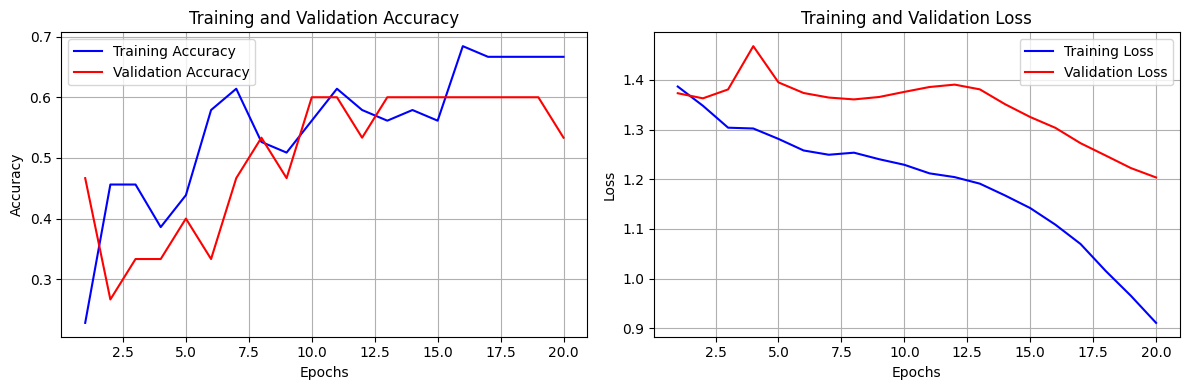

In [3]:
# Generate model summary for the best model
best_model = Sequential()
best_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
best_model.add(SpatialDropout1D(0.2))
best_model.add(LSTM(128, return_sequences=True))
best_model.add(LSTM(64))
best_model.add(Dense(4, activation='softmax'))
best_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_test, y_test))

# Extract training and validation accuracy and loss
train_accuracy = best_model.history.history['accuracy']
val_accuracy = best_model.history.history['val_accuracy']
train_loss = best_model.history.history['loss']
val_loss = best_model.history.history['val_loss']

# Plot performance graphs
epochs = range(1, len(train_accuracy) + 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Save Model

In [28]:
# Custom model name
model_name = "custom_sentiment_model"

# Save the model with a custom name
model.save(f'../data/model/{model_name}_{best_epochs}ep_{best_batch_size}bs.keras')

# Testing

In [6]:
# Assuming you already have the trained model and necessary pre-processing in place

# Replace 'your_text_here' with the text you want to analyze
new_text = ["Fuck this shit"]

# Tokenize and pad the new text
new_sequences = tokenizer.texts_to_sequences(new_text)
new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Make predictions
predictions = model.predict(new_sequences)

# Define a list of sentiment labels corresponding to your model's output order
sentiment_labels = ['Positive Sentiment', 'Negative Sentiment', 'Neutral Sentiment', 'Mixed Sentiment']

# Find the index with the maximum prediction value
predicted_index = np.argmax(predictions)

# Print the sentiment label based on the predicted index
print(new_text)
print(predictions)
print(sentiment_labels[predicted_index])


1/1 [==============================] - 0s 31ms/step
['Fuck this shit']
[[0.08873248 0.14114453 0.5688809  0.20124203]]
Neutral Sentiment
